<a href="https://colab.research.google.com/github/Yamito548/Act-Examen-SNS/blob/main/examen_pr%C3%A1ctico_sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno tiene partes del código de la actividad 3.4, pero debido a que me estaba dando fallos, problablemente por todo lo que tenía en dicha actividad esta la hice aparte para evitar problemas y errores.

# Librerías

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
data = pd.read_csv("/content/wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
# Verificar valores faltantes en el DataFrame
missing_values = data.isnull().sum()

print("Valores faltantes por columna:")
print(missing_values)
#En este dataset no hay datos faltantes

Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Usando naivebayes

In [14]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB,ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

naive_bayes_models = [GaussianNB(), MultinomialNB(), BernoulliNB(), CategoricalNB()]


# Modelo GaussianNB
modelo_gaussian = GaussianNB()
modelo_gaussian.fit(X_train, y_train)
y_pred_gaussian = modelo_gaussian.predict(X_test)
accuracy_gaussian = round(accuracy_score(y_test, y_pred_gaussian),2)
print(f"GaussianNB - Precisión del modelo: {accuracy_gaussian}")

# Modelo MultinomialNB
modelo_multinomial = MultinomialNB()
modelo_multinomial.fit(X_train, y_train)
y_pred_multinomial = modelo_multinomial.predict(X_test)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print(f"MultinomialNB - Precisión del modelo: {accuracy_multinomial}")

# Modelo BernoulliNB
modelo_bernoulli = BernoulliNB()
modelo_bernoulli.fit(X_train, y_train)
y_pred_bernoulli = modelo_bernoulli.predict(X_test)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print(f"BernoulliNB - Precisión del modelo: {accuracy_bernoulli}")


GaussianNB - Precisión del modelo: 0.6
MultinomialNB - Precisión del modelo: 0.3624454148471616
BernoulliNB - Precisión del modelo: 0.4192139737991266


# Usando KNN cross validation

Precisión media para cada número de vecinos:  [0.5292997778288516, 0.4847084961311576, 0.4750746954723052, 0.4951735233279706, 0.48467785183482726, 0.49173753160193057, 0.4969508925151306, 0.48989887382210984, 0.4907722362675247, 0.5004098674634184, 0.4715620930054394, 0.47600934651038074, 0.49608519114379834, 0.47589826093618326, 0.48471232666819886, 0.4785758063280472, 0.4784800429020149, 0.47762966367884774, 0.48118823259020915, 0.4881674710794453, 0.4802918869225465, 0.4750632038611814, 0.4794146939400904, 0.4820769171837891, 0.4995786409254578, 0.46544089481345285, 0.4812150463494982, 0.4873209223933195, 0.4829809239255344, 0.48820194591281696]
Preciosión media total:  0.4856199085778493


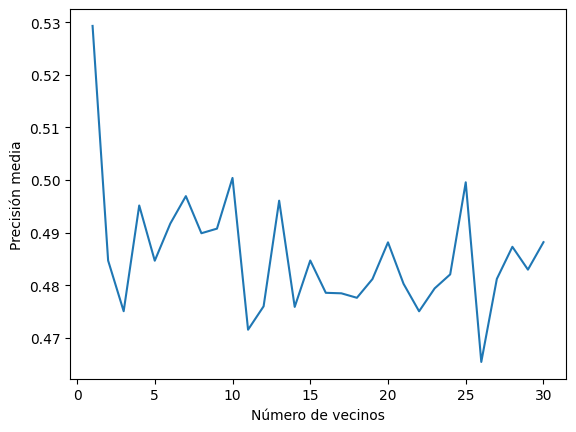

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# Crear el objeto KFold
kf = KFold(n_splits=5, shuffle=True) # 5 es el número de pliegues en k-fold

# Si quieres probar diferentes valores para el número de vecinos y graficar los resultados, puedes hacerlo así:
vecinos = list(range(1, 31))
precisions = []

for i in vecinos:
    # Crear el modelo KNN dentro del bucle
    knn = KNeighborsClassifier(n_neighbors=i)

    # Usar cross_val_score para hacer la validación cruzada k-fold
    scores = cross_val_score(knn, X, y, cv=kf)

    # Añadir la precisión media a la lista de precisiones
    precisions.append(scores.mean())

# Imprimir los resultados
precision_media_total = np.mean(precisions)
print("Precisión media para cada número de vecinos: ", precisions)
print("Preciosión media total: ",precision_media_total)
plt.plot(vecinos, precisions)
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión media')
plt.show()

#  Utilizando cross validation (Kfold) + naivebayes

In [17]:
#
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]
from sklearn.model_selection import KFold
cv = KFold(n_splits = 3, shuffle = True)
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Modelo: GaussianNB =   0.50
Modelo: MultiNomialNB =   0.31
Modelo: BernouilliNB =   0.38
Modelo: ComplementNB =   0.46


# Vemos los resultados

In [15]:
print("Preciosión media total usando knn: ",precision_media_total)
print(f"GaussianNB - Precisión del modelo: {accuracy_gaussian}")
print(f"MultinomialNB - Precisión del modelo: {accuracy_multinomial}")
print(f"BernoulliNB - Precisión del modelo: {accuracy_bernoulli}")

Preciosión media total usando knn:  0.426389335784877
GaussianNB - Precisión del modelo: 0.6
MultinomialNB - Precisión del modelo: 0.3624454148471616
BernoulliNB - Precisión del modelo: 0.4192139737991266


Como se puede ver aquí, el mejor resultado que nos da es por parte del modelo GaussianNB, sin usar cross validation ni knn. Usando knn reduce mucho su precisión.

# Manipulación de los modelos a usar

In [8]:
#Librerías
import numpy as np
from sklearn import svm
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__

'1.2.2'

# Subimos el modelo a un archivo

In [18]:
#Grabamos el archivo
knn = KNeighborsClassifier().fit(X_train,y_train)
pkl_filname = "wine_model.pkl"
#WB, significa write and binary, es decir escribir el archivo
with open(pkl_filname, 'wb') as file:
  pickle.dump(knn,file)

# Lo cargamos

In [10]:
#Cargamos el modelo
pkl_filname = "wine_model.pkl"
#RB, significa read and binary, es decir leer el archivo
with open(pkl_filname, 'rb') as file:
    loaded_model = pickle.load(file)

# Predicción con el modelo entrenado con knn

In [11]:
#Con datos nuevos, tuve que añadir el ID, que no lo puse
X_in = np.asarray([7.0,0.65,0.10,2.0,0.077,25.0,50.0,0.9978,3.51,0.50,9.4,1598]).reshape(1,-1)
predicción = knn.predict(X_in)
#Vamos a ver lo que predice según los datos obtenidos
predicción[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


6

# Predicción con el modelo gaussianNB sin nada más

In [20]:
#Grabamos el archivo
pkl_filname = "wine_model_gaussian.pkl"
#WB, significa write and binary, es decir escribir el archivo
with open(pkl_filname, 'wb') as file:
  pickle.dump(modelo_gaussian,file)

  #Cargamos el modelo
pkl_filname = "wine_model_gaussian.pkl"
#RB, significa read and binary, es decir leer el archivo
with open(pkl_filname, 'rb') as file:
    loaded_model = pickle.load(file)

In [21]:
#Con datos nuevos, tuve que añadir el ID, que no lo puse
X_in = np.asarray([7.0,0.65,0.10,2.0,0.077,25.0,50.0,0.9978,3.51,0.50,9.4,1598]).reshape(1,-1)
predicción = modelo_gaussian.predict(X_in)
#Vamos a ver lo que predice según los datos obtenidos
predicción[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


5

In [23]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
